[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64
       text_length   word_count
count  5572.000000  5572.000000
mean     80.118808    15.494436
std      59.690841    11.329427
min       2.000000     1.000000
25%      36.000000     7.000000
50%      61.000000    12.000000
75%     121.000000    23.000000
max     910.000000   171.000000


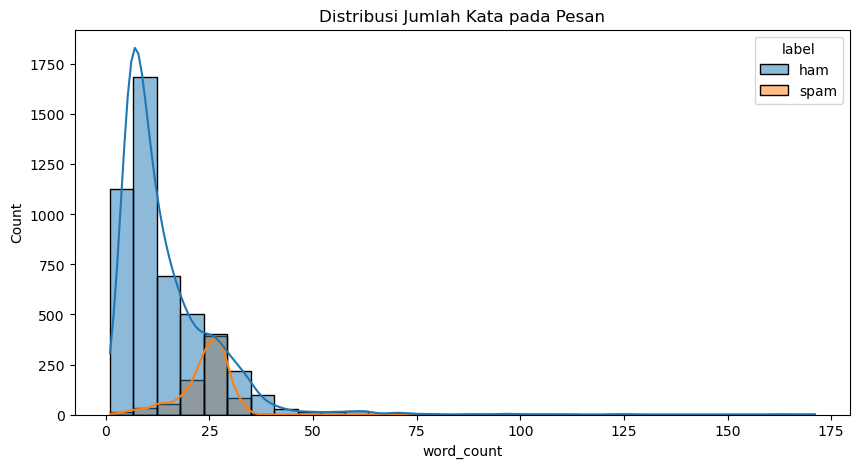

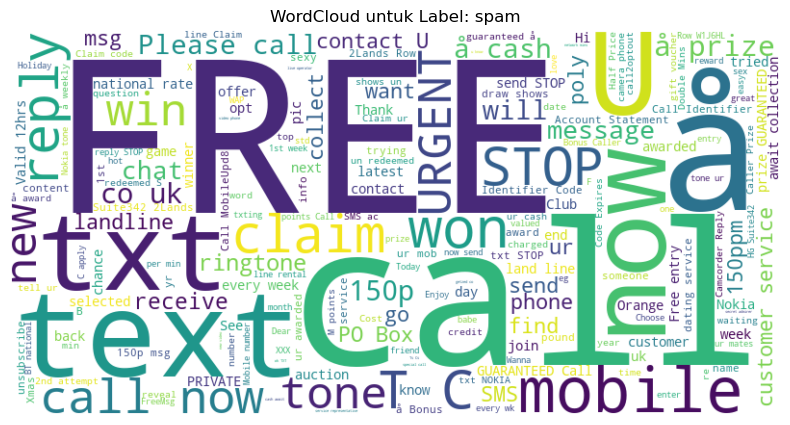

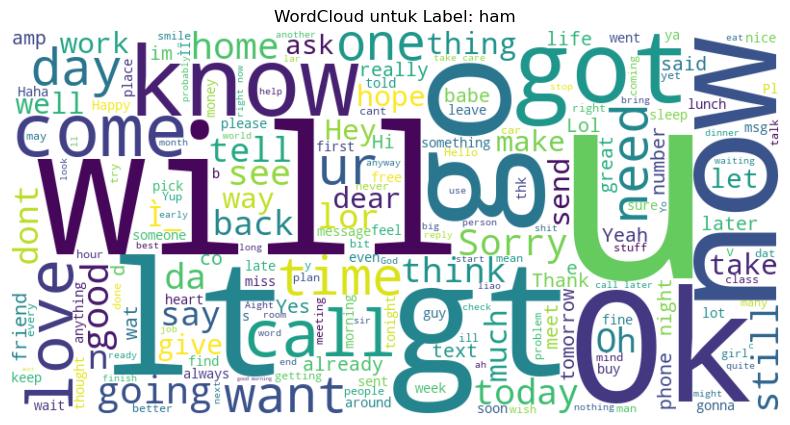

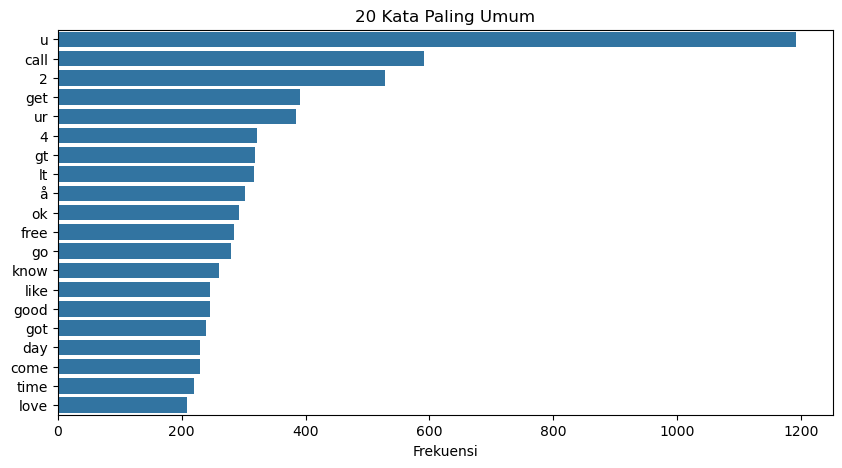

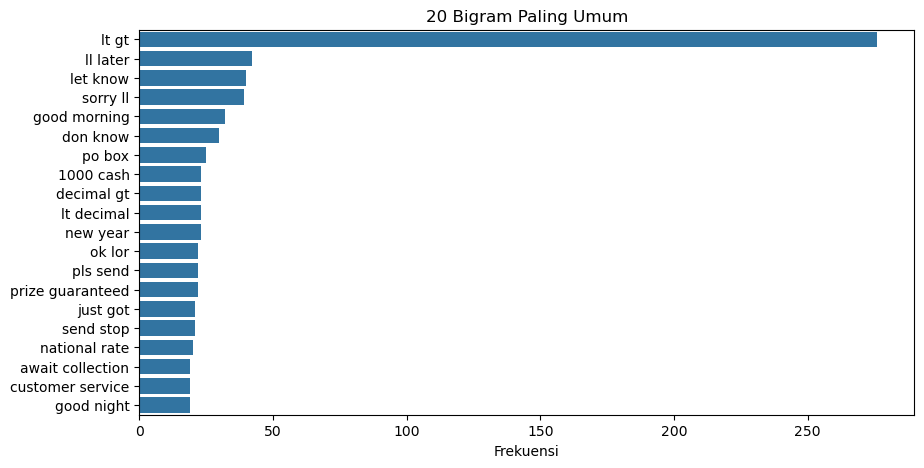

In [1]:
# --- 1. Import Library ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

# --- 2. Baca Data ---
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0, 1], names=['label', 'text'], skiprows=1)

# --- 3. Cek Data Awal ---
print(df.head())
print(df['label'].value_counts())

# --- 4. Panjang Teks ---
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# --- 5. Statistik Dasar ---
print(df[['text_length', 'word_count']].describe())

# --- 6. Visualisasi Distribusi Panjang Pesan ---
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='word_count', hue='label', bins=30, kde=True)
plt.title('Distribusi Jumlah Kata pada Pesan')
plt.show()

# --- 7. WordCloud ---
def plot_wordcloud(label):
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Label: {label}')
    plt.show()

plot_wordcloud('spam')
plot_wordcloud('ham')

# --- 8. Frekuensi Kata Umum ---
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    words = text.split()
    return [word for word in words if word not in stop_words]

all_words = df['text'].apply(clean_text).sum()
common_words = Counter(all_words).most_common(20)

# Visualisasi
words, freqs = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(freqs), y=list(words))
plt.title('20 Kata Paling Umum')
plt.xlabel('Frekuensi')
plt.show()

# --- 9. Analisis Bigram ---
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X2 = vectorizer.fit_transform(df['text'])
bigrams_freq = zip(vectorizer.get_feature_names_out(), X2.sum(axis=0).tolist()[0])
top_bigrams = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)[:20]

# Visualisasi
bigrams, freqs = zip(*top_bigrams)
plt.figure(figsize=(10,5))
sns.barplot(x=list(freqs), y=list(bigrams))
plt.title('20 Bigram Paling Umum')
plt.xlabel('Frekuensi')
plt.show()
